### import libraries
- pandas
- numpy
- matplotlib's plt
- scipy's optimize
### Read CSV file and store it in df
- *pixel_replica* regroup df according to pixel number
### define functions
- *calculate_stats* gets mean and standard deviation of x and y coordinates at given pixel
- *plot_histogram* and *plot_scatter* using world coordinates
- *fit_circle* Least Square Fitting to a circular trajectory
- *convert_df2* to randomize copy number using its center position and width with uniform rbdm number. Then, same fit_circle as above

World Circle Center = (1991.3854, -100.1693), Radius = 1991.3877, Radius Error = 0.1057
Digital Circle Center = (1389.7709, -57.6199), Radius = 1388.9462, Radius Error = 0.7558


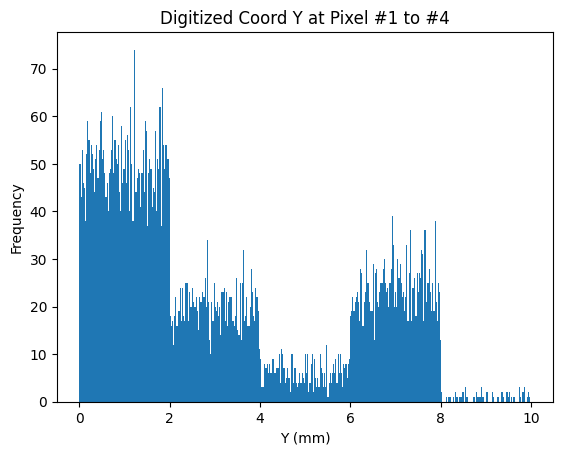

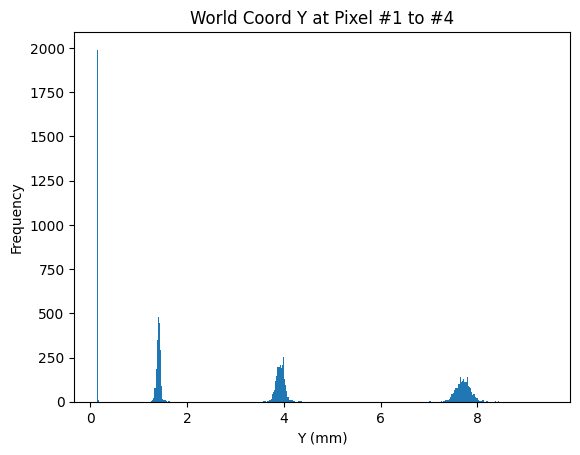

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def calculate_stats(data, column):
    mean_value = data[column].mean()
    std_value = data[column].std()
    return mean_value, std_value

def plot_histogram(data, column, bins, xlabel, ylabel, title, filename):
    plt.hist(data[column], bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def plot_scatter(data, x_column, y_column, xlabel, ylabel, title, filename):
    plt.scatter(data[x_column], data[y_column], c="red", s=1, marker=".")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def fit_circle(x, y):
    def calc_radius(c):
        return np.sqrt((x - c[0])**2 + (y - c[1])**2)
    
    def fun(c):
        ri = calc_radius(c)
        return ri - ri.mean()
    
    center_estimate = np.mean(x), np.mean(y)
    result = least_squares(fun, center_estimate)
    center = result.x
    radius = calc_radius(center).mean()
    residuals = calc_radius(center) - radius
    radius_error = np.sqrt(np.sum(residuals**2) / len(residuals))
    return center, radius, radius_error

# randomize Y coordinate from copy No 5~9 
def convert_df2(df):
    conversion = {5: 1.0, 6: 3.0, 7: 5.0, 8: 7.0, 9: 9.0}
    df[2] = df[2].map(conversion)
    df[2] = df[2] + np.random.uniform(-1.0, 1.0, size=df[2].shape) # Adding error
    return df

def residuals(params, x, y):
    xc, yc, r = params
    return np.sqrt((x - xc)**2 + (y - yc)**2) - r


# Read the CSV file
df = pd.read_csv("P10_Pixel_Four_Output.csv", header=None)

# Extract data frames according to the Pixel replica number in column 3
pixel_replicas = {
    1000: df[df.iloc[:, 3] == 1000],
    1001: df[df.iloc[:, 3] == 1001],
    1002: df[df.iloc[:, 3] == 1002],
    1003: df[df.iloc[:, 3] == 1003]
}

# Calculate and print statistics for each pixel replica
for pixel_id, data in pixel_replicas.items():
    mean_y, std_y = calculate_stats(data, 5)
###    print(f"Y at Pixel {pixel_id}, mean = {mean_y:.4f}, sigma = {std_y:.4f}")
    
    mean_x, std_x = calculate_stats(data, 4)
###    print(f"X at Pixel {pixel_id}, mean = {mean_x:.4f}, sigma = {std_x:.4f}")

# Perform least squares fit for all data points in df[5] and df[6]
center, radius, radius_error = fit_circle(df[5], df[6])
print(f"World Circle Center = ({center[0]:.4f}, {center[1]:.4f}), Radius = {radius:.4f}, Radius Error = {radius_error:.4f}")

# Perform least squares fit for df[2] vs. df[6]
df = convert_df2(df)
# Perform least squares fit for all data points in df[2] and df[6]
center, radius, radius_error = fit_circle(df[2], df[6])
print(f"Digital Circle Center = ({center[0]:.4f}, {center[1]:.4f}), Radius = {radius:.4f}, Radius Error = {radius_error:.4f}")


# Plot histogram of coordinate Y including all pixels
plot_histogram(df, 2, bins=400, xlabel="Y (mm)", ylabel="Frequency", title="Digitized Coord Y at Pixel #1 to #4", filename="DigitalY")
# Plot histogram of coordinate Y including all pixels
plot_histogram(df, 5, bins=400, xlabel="Y (mm)", ylabel="Frequency", title="World Coord Y at Pixel #1 to #4", filename="WorldY")

# Plot scatter plots for each pixel replica
###for pixel_id, data in pixel_replicas.items():
###    plot_scatter(data, 4, 5, xlabel="X (mm)", ylabel="Y (mm)", title=f"X vs Y at Pixel {pixel_id}", filename=f"scatterXY_{pixel_id}")